In [ ]:
# Importing necessary modules

import sklearn
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
import matplotlib

from matplotlib import pyplot as plt
import pylab
from pylab import plot,show
from pylab import legend,title,xlabel,ylabel



# Reading and Understanding Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_app=pd.read_csv("/content/drive/MyDrive/CaseStudy/application_data.csv",encoding='latin1')

In [ ]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Using describe columns to check the mean, median, mode and other quantile values

In [ ]:
df_app.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
df_app.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


# Checking Null Values

Here we are checking the count of null values in every column

In [ ]:
null_values = df_app.isnull().sum()
print(null_values[0:30])

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

# Finding the percentage of NULL values in the whole data frame

In [ ]:
# Percentage of null values in the data
total_cells = np.product(df_app.shape)

total_missing = null_values.sum()

(total_missing/total_cells)*100

24.39594190712943

We got 24.4 % NULL values in the complete data frame, thus we need to treat these null values.

# Creating a function to calculate % Null values in every column

In [ ]:
def null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

Calulating Null % for columns in Application Data

In [ ]:
Na_col = null_percentage(df_app)
print(Na_col)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64


# Columns with more than 50 % Null Values

We need to drop the columns with more than 50% null values

In [ ]:
Na_col = Na_col[Na_col>50]
print(Na_col)

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

# Plotting null percentage against columns

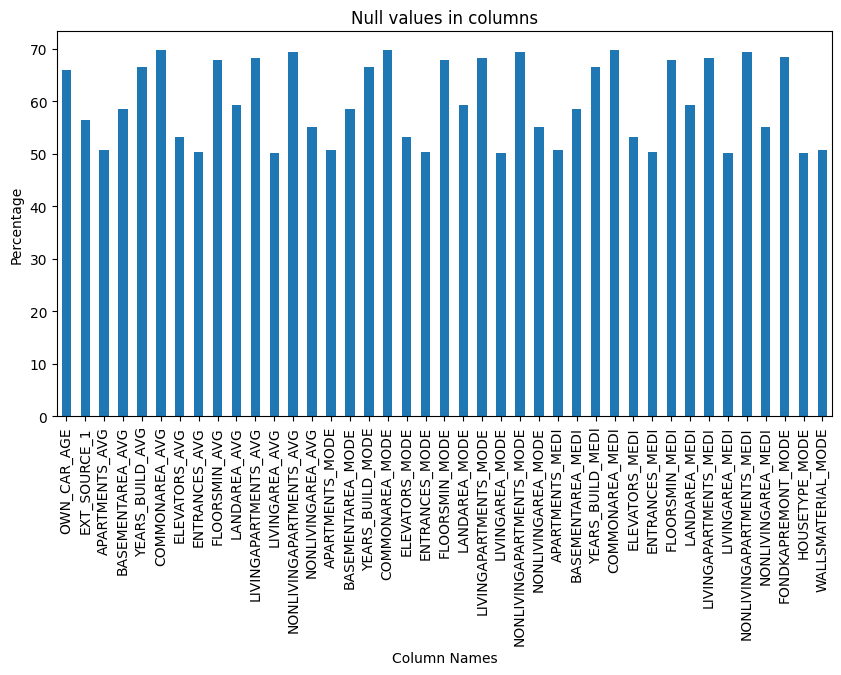

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
Na_col.plot(kind="bar",x='column_name',y='null_percentage')
plt.title("Null values in columns")
plt.xlabel('Column Names')
plt.ylabel('Percentage')
plt.show()

# Dropping Columns with Null values more than 50%

In [ ]:
df_app_filtered = df_app.drop(Na_col.index,axis=1)

 Checking filtered data

In [ ]:
df_app_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

# Checking unique values in the columns to be able to differentiate the categorical and continuous data

In [ ]:
df_app_filtered.nunique().sort_values(ascending=False)


SK_ID_CURR            307511
EXT_SOURCE_2          119831
DAYS_BIRTH             17460
DAYS_REGISTRATION      15688
AMT_ANNUITY            13672
                       ...  
FLAG_OWN_CAR               2
FLAG_DOCUMENT_2            2
FLAG_DOCUMENT_3            2
FLAG_DOCUMENT_4            2
NAME_CONTRACT_TYPE         2
Length: 81, dtype: int64

### Checking number of columns and rows after removing NULL columns

In [ ]:
print(df_app_filtered.shape)

(307511, 81)


# Finding the Correlation

In [ ]:
df_app_filtered.corr()

<ipython-input-26-7b8f6c6124cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_app_filtered.corr()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


# Selecting Columns which are necessary for analysis

We have selected the columns based on
- the null percentage
- the correlation factor
- logical significance of the column.

In [ ]:
new_df_app = df_app_filtered[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
               'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
               'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',
               'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY',
               'ORGANIZATION_TYPE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
               'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_YEAR']]

new_df_app is now our final dataframe out of which no other column can be removed for better analysis

In [ ]:
new_df_app.shape

(307511, 33)

Counting null values

In [ ]:
new_df_app.isna().sum()


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
D

# Calculating null percentage

In [ ]:
null_percentage_final = null_percentage(new_df_app)
null_percentage_final

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
D

### We have OCCUPATION_TYPE and AMT_REQ_CREDIT_BUREAU_YEAR where the null percentage is still significant

We still need to treat this data, thus we will replace the null values


### Now the question arises, with what we should fill the data, lets check out the mean, median for the AMT_REQ_CREDIT_BUREAU_YEAR column

In [ ]:
np.mean(new_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'])

1.899974435321363

In [ ]:
np.median(new_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'])

nan

Mean and median cannot be filled in the columns as it can affect the data, since it is categorical.

In [ ]:
new_df_app[['OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_YEAR']]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,Laborers,1.0
1,Core staff,0.0
2,Laborers,0.0
3,Laborers,NaN
4,Core staff,0.0
...,...,...
307506,Sales staff,NaN
307507,NaN,NaN
307508,Managers,1.0
307509,Laborers,0.0


### We will be using forward fill to fill the null values in the new_df

In [ ]:
new_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(method = 'ffill', inplace = True)

<ipython-input-37-9b4cf10a981c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(method = 'ffill', inplace = True)


In [ ]:
# Checking null percentage
null_percentage_final = null_percentage(new_df_app)
null_percentage_final

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
D

Here still we have OCCUPATION_TYPE with higher null percentage ~ 33%
- OCCUPATION_TYPE = NULL comprises majority of the data, we cannot drop the data
- We cannot fill any value as it will create a bias in the data.

Thus we replace the null values with 'Unknown'


In [ ]:
new_df_app['OCCUPATION_TYPE'].fillna(value=  'Unknown', inplace = True)

<ipython-input-39-40d443a3f962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_app['OCCUPATION_TYPE'].fillna(value=  'Unknown', inplace = True)


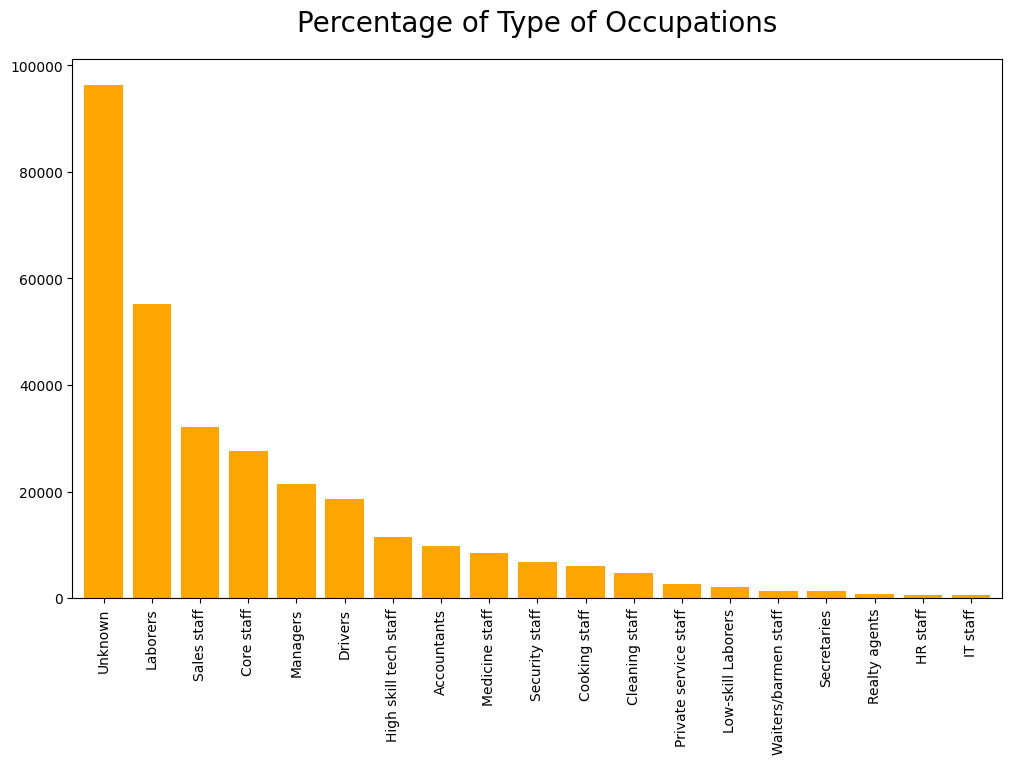

In [ ]:
plt.figure(figsize = [12,7])
(new_df_app["OCCUPATION_TYPE"].value_counts()).plot.bar(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

In [ ]:
null_percentage_final = null_percentage(new_df_app)
null_percentage_final

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT_W_CITY    0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE    

## DAYS_BIRTH is in negative days. Thus we first convert it into positive value and divide by 365 to get the age in years

In [ ]:
new_df_app['DAYS_BIRTH'] = (round(new_df_app['DAYS_BIRTH'].abs()//365,2)).astype(int)
new_df_app['DAYS_BIRTH']

<ipython-input-45-ed8bb14ab8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_app['DAYS_BIRTH'] = (round(new_df_app['DAYS_BIRTH'].abs()//365,2)).astype(int)


0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

## Creating bins to categorise the age in various categories as defined

In [ ]:
new_df_app['DAYS_BIRTH'] = pd.cut(x=new_df_app['DAYS_BIRTH'],
                      bins=[0,20,30,40,50,60,100],
                             labels=['0-20','21-30','31-40','41-50','51-60','61-100']
                    )

<ipython-input-47-3610523acd0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_app['DAYS_BIRTH'] = pd.cut(x=new_df_app['DAYS_BIRTH'],


In [ ]:
new_df_app['DAYS_BIRTH']

0         21-30
1         41-50
2         51-60
3         51-60
4         51-60
          ...  
307506    21-30
307507    51-60
307508    41-50
307509    31-40
307510    41-50
Name: DAYS_BIRTH, Length: 307511, dtype: category
Categories (6, object): ['0-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-100']

<Axes: xlabel='DAYS_BIRTH', ylabel='count'>

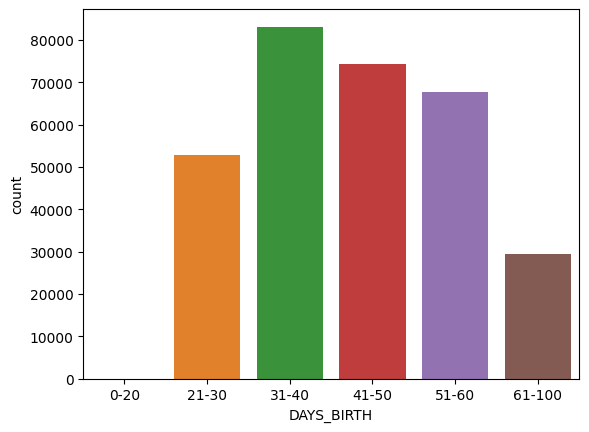

In [ ]:
sns.countplot(x='DAYS_BIRTH',data=new_df_app)

# As we can see the count of applications are the highest from the age category 31-40 yrs

In [ ]:
# Calculating gender count
new_df_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

## Count plot for number of people according to the gender

<Axes: xlabel='CODE_GENDER', ylabel='count'>

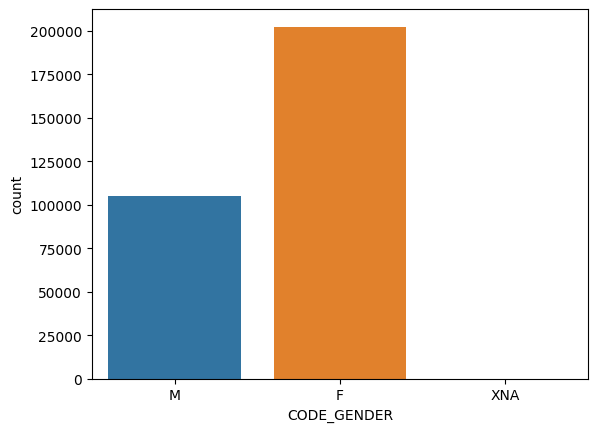

In [ ]:
sns.countplot(x='CODE_GENDER',data=new_df_app)

## DAYS_EMPLOYED is in negative days. Thus we first convert it into positive value and divide by 365 to get the experience in years

In [ ]:
new_df_app['DAYS_EMPLOYED'] = (round(new_df_app['DAYS_EMPLOYED'].abs()//365,2)).astype(int)
new_df_app['DAYS_EMPLOYED']

<ipython-input-53-a93ab782bb80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_app['DAYS_EMPLOYED'] = (round(new_df_app['DAYS_EMPLOYED'].abs()//365,2)).astype(int)


0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [ ]:
new_df_app.iloc[np.where(new_df_app['DAYS_EMPLOYED']>45)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.205747,1.0,0.0,1.0,0.0,0,1,0,0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0.555183,0.0,0.0,0.0,0.0,0,0,0,0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0.624305,0.0,0.0,0.0,0.0,0,0,0,0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0.650765,0.0,0.0,0.0,0.0,0,1,0,0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0.766138,0.0,0.0,0.0,0.0,0,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0.195625,11.0,2.0,11.0,0.0,0,1,0,0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0.589906,1.0,1.0,1.0,1.0,0,0,0,0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0.307082,0.0,0.0,0.0,0.0,0,1,0,0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0.346391,0.0,0.0,0.0,0.0,0,0,0,0,0.0


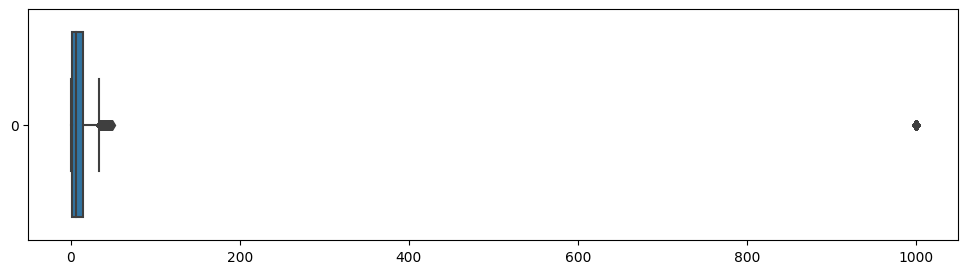

In [ ]:
plt.figure(figsize = (12,3))
sns.boxplot(new_df_app['DAYS_EMPLOYED'],orient='h')
plt.show()

## If we see the box plot of the experience in years, we can see there are around ~55k records where the experience is in 1000 years, which is significantly .
### This data is of either unemployed individuals or pensioners

In [ ]:
# Unemployed count
new_df_app.iloc[np.where(new_df_app['NAME_INCOME_TYPE']=='Unemployed')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,...,0.105875,NaN,NaN,NaN,NaN,0,0,0,0,0.0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,...,0.617056,2.0,0.0,2.0,0.0,0,0,0,0,2.0
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,...,0.006939,0.0,0.0,0.0,0.0,0,0,0,0,2.0
35352,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,...,0.585243,3.0,0.0,2.0,0.0,0,0,0,0,0.0
37512,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,...,0.276265,0.0,0.0,0.0,0.0,0,0,0,0,1.0
41723,148306,0,Revolving loans,F,N,Y,0,270000.0,135000.0,6750.0,...,0.600470,0.0,0.0,0.0,0.0,0,0,0,0,7.0
77179,189489,0,Cash loans,F,N,N,1,54000.0,634500.0,23643.0,...,0.647398,0.0,0.0,0.0,0.0,0,0,0,0,2.0
78336,190812,1,Cash loans,F,N,Y,0,45000.0,328500.0,10629.0,...,0.428753,0.0,0.0,0.0,0.0,0,0,0,0,2.0
80704,193571,1,Cash loans,F,N,Y,0,90000.0,571500.0,20524.5,...,0.698729,3.0,2.0,3.0,2.0,0,0,0,0,4.0
92061,206901,0,Revolving loans,M,Y,Y,0,270000.0,855000.0,42750.0,...,0.399796,NaN,NaN,NaN,NaN,0,0,0,0,0.0


## We have 22 records of unemployed individuals. Thus the rest we conclude as penbsioners. We do not delete/replace anything.

# Analysing Children Count

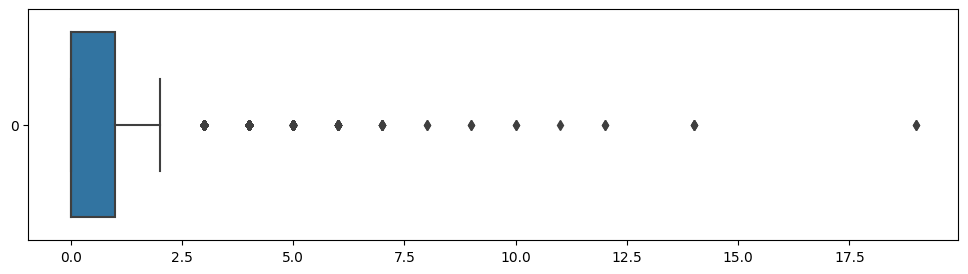

In [ ]:
plt.figure(figsize = (12,3))
sns.boxplot(new_df_app['CNT_CHILDREN'],orient='h')
plt.show()